**Artamonov Kirill, B01-007**

# Task VIII.11.5

x’ = - 𝜎 (x - y)

y’ = -xz + rx - y

z’ = xy - bz

x(0) = y(0) = z(0) = 1

Importing libriaries:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Defining a system:

In [16]:
def system(t, u, sigma, r, b):
    x, y, z = u
    return np.array([-sigma*(x-y), r*x - y - x*z, x*y - b*z])

u0 = np.array([1, 1, 1])
sigma, r, b = 10, 28, 8/3
t0, tf, h = 0, 50, 0.01

## **Runge Kuttas method of 4th order:**

In [17]:
def rungeKutta_4(lorenz, t0, u0, tf, h, sigma, r, b):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    u = np.zeros((n, len(u0)))
    u[0] = u0
    for i in range(n-1):
        k1 = h * lorenz(t[i], u[i], sigma, r, b)
        k2 = h * lorenz(t[i]+h/2, u[i]+k1/2, sigma, r, b)
        k3 = h * lorenz(t[i]+h/2, u[i]+k2/2, sigma, r, b)
        k4 = h * lorenz(t[i]+h, u[i]+k3, sigma, r, b)
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return t, u


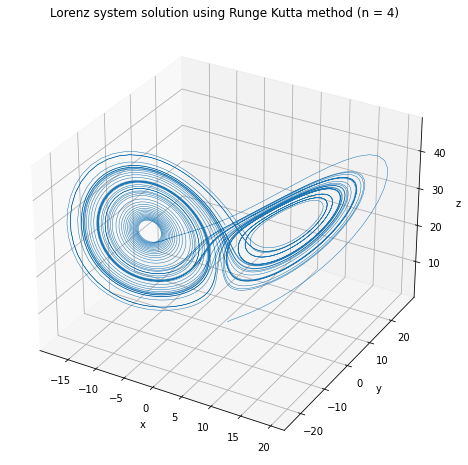

In [18]:
t, u = rungeKutta_4(system, t0, u0, tf, h, sigma, r, b)

# Plot the solution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(u[:,0], u[:,1], u[:,2], lw=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz system solution using Runge Kutta method (n = 4)')
plt.show()

## **Backward differentiation formula**

In [19]:
def backDiff_3(system, t0, u0, tf, h, sigma, r, b):
    t = np.arange(t0, tf+h, h)
    n = len(t)
    u = np.zeros((n, len(u0)))
    u[:3] = u0.reshape(3,-1)
    for i in range(2, n-1):
        fn = system(t[i], u[i], sigma, r, b)
        u[i+1] = (4/3)*u[i] - (1/3)*u[i-1] + (2/3)*h*fn
    return t, u

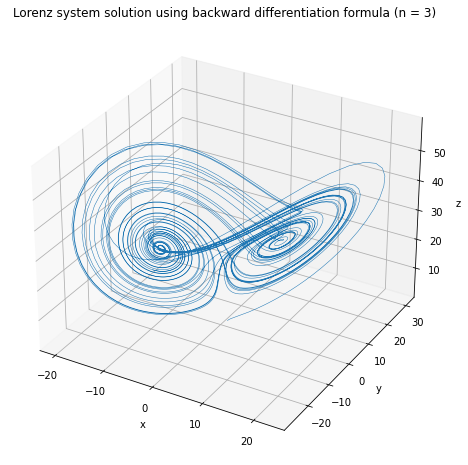

In [20]:
t, u = backDiff_3(system, t0, u0, tf, h, sigma, r, b)

# Plot the solution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(u[:,0], u[:,1], u[:,2], lw=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz system solution using backward differentiation formula (n = 3)')
plt.show()